<a href="https://colab.research.google.com/github/Elisa-Torres/SHTE2023/blob/main/Elisa_Semi_final_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

!wget -q https://git.io/JYx2x -O resnet_cifar10_v2.py
import resnet_cifar10_v2

drive.mount('/content/drive/')
loc = 'drive/MyDrive/Shtem2023/'
print(os.listdir(loc+'/Results'))

Mounted at /content/drive/
['self_128_8_breastcancer.csv', 'cosineLoss_128_8_breastcancer (1).csv', 'cosineLoss_128_8_breastcancer.csv', 'cosineLoss_128_8_glaucoma.csv', 'self_128_8_glaucoma.csv', 'self_384_32_covid.csv', 'cosineLoss_384_32_covid.csv', 'cosineLoss_128_8_applescab.csv', 'self_128_8_applescab.csv', 'cosineLoss_128_128_breastcancer.csv', 'self_128_128_breastcancer.csv', 'cosineLoss_128_128_glaucoma.csv', 'self_128_128_glaucoma.csv', 'cosineLoss_128_128_applescab.csv', 'self_128_128_applescab.csv', 'self_384_16_covid.csv', 'cosineLoss_128_64_breastcancer.csv', 'self_128_64_breastcancer.csv', 'self_160_64_breastcancer.csv', 'selfLess_16_breastcancer.csv', 'selfLess_24_breastcancer.csv', 'cosineLoss_128_64_glaucoma.csv', 'selfLess_32_breastcancer.csv', 'self_160_56_breastcancer.csv', 'self_128_64_glaucoma.csv', 'selfLess_40_breastcancer.csv', 'selfLess_48_breastcancer.csv', 'cosineLoss_128_64_applescab.csv', 'selfLess_56_breastcancer.csv', 'self_128_64_applescab.csv', 'selfL

In [ ]:
all_CSV = {}
for filename in os.listdir(loc + 'Results'):
  if '.csv' in filename:
    all_CSV[filename]= pd.read_csv (loc + 'Results/'+ filename)


In [ ]:
all_CSV['self_128_8_breastcancer.csv']

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,1.925300,0.875,2.032695,0.788462
1,1,1.872540,0.875,2.030438,0.788462
2,2,1.776986,1.000,2.032116,0.788462
3,3,1.829853,0.875,2.039574,0.788462
4,4,1.756246,0.875,2.052984,0.788462
5,5,1.741154,0.875,2.070906,0.788462
6,6,1.707812,0.875,2.091477,0.788462
7,7,1.698389,0.875,2.113237,0.788462
8,8,1.686437,0.875,2.134869,0.788462
9,9,1.678638,0.875,2.155825,0.788462


In [ ]:
all_CSV['self_128_8_breastcancer.csv']['val_accuracy'].values

array([0.78846157, 0.78846157, 0.78846157, 0.78846157, 0.78846157,
       0.78846157, 0.78846157, 0.78846157, 0.78846157, 0.78846157,
       0.78846157, 0.78846157, 0.78846157, 0.78846157, 0.78846157])

<Axes: >

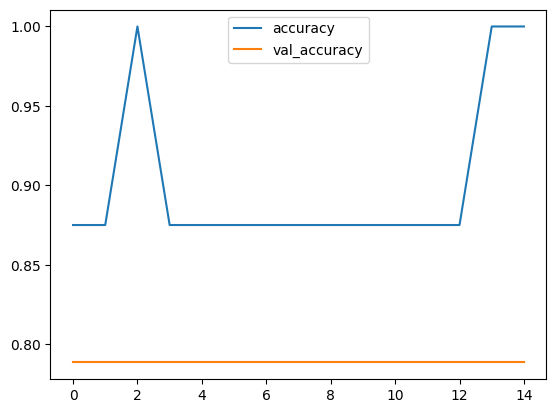

In [ ]:
all_CSV['self_128_8_breastcancer.csv'].plot(y = ['accuracy', 'val_accuracy'])

<Axes: >

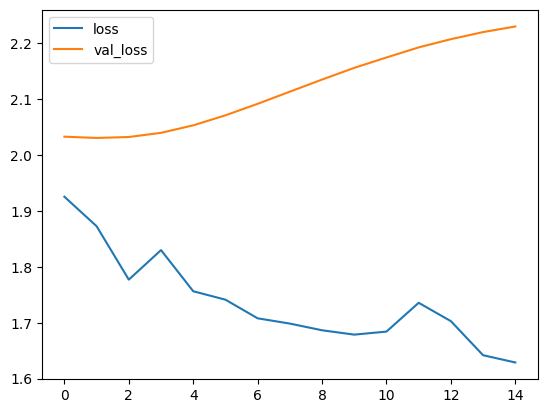

In [ ]:
all_CSV['self_128_8_breastcancer.csv'].plot(y = ['loss', 'val_loss'])

In [ ]:
all_CSV['selfLess_104_cifar10.csv']

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,4.021951,0.115385,3.834253,0.076923
1,1,3.810963,0.250000,3.805825,0.153846
2,2,3.627624,0.307692,3.784833,0.201923
3,3,3.442196,0.326923,3.801851,0.125000
4,4,3.448733,0.317308,3.793072,0.163462
5,5,3.397113,0.375000,3.772958,0.129808
6,6,3.279569,0.432692,3.776184,0.091346
7,7,3.126684,0.432692,3.783320,0.125000
8,8,2.896817,0.490385,3.850556,0.091346
9,9,2.791541,0.557692,3.940782,0.110577


In [ ]:
cifarselfless=[]
cifarsizes=[]
for filename in os.listdir(loc + 'Results'):
  if 'covid' in filename and 'selfLess' in filename:
    cifarselfless.append (np.max(all_CSV[filename] ['accuracy'].values))
    elisa= filename.index ('_')
    elisa2= filename.index ('_',elisa + 1)
    cifarsizes.append (int(filename[elisa + 1: elisa2]))
'''all_CSV = {}
for filename in os.listdir(loc + 'Results'):
  if '.csv' in filename:
    all_CSV[filename]= pd.read_csv (loc + 'Results/'+ filename)'''

"all_CSV = {}\nfor filename in os.listdir(loc + 'Results'):\n  if '.csv' in filename:\n    all_CSV[filename]= pd.read_csv (loc + 'Results/'+ filename)"

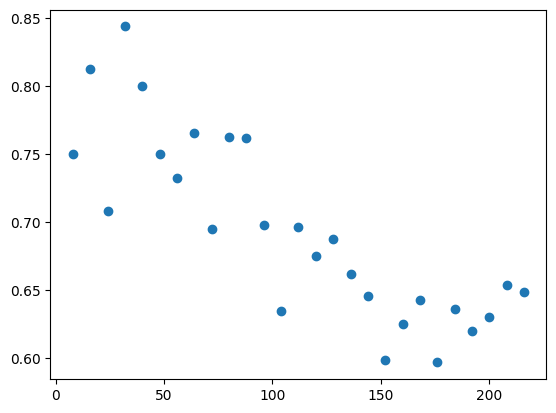

In [ ]:
cifarselfless
cifarsizes
plt.scatter(cifarsizes, cifarselfless)

In [ ]:
for filename in os.listdir(loc + 'Results'):
  if '.csv' in filename:
    print (filename)
    Iris = pd.read_csv(loc + 'Results/'+ filename)
    print (Iris.columns)


self_128_8_breastcancer.csv
Index(['Unnamed: 0', 'loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')
cosineLoss_128_8_breastcancer (1).csv
Index(['Unnamed: 0', 'loss'], dtype='object')
cosineLoss_128_8_breastcancer.csv
Index(['Unnamed: 0', 'loss'], dtype='object')
cosineLoss_128_8_glaucoma.csv
Index(['Unnamed: 0', 'loss'], dtype='object')
self_128_8_glaucoma.csv
Index(['Unnamed: 0', 'loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')
self_384_32_covid.csv
Index(['Unnamed: 0', 'loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')
cosineLoss_384_32_covid.csv
Index(['Unnamed: 0', 'loss'], dtype='object')
cosineLoss_128_8_applescab.csv
Index(['Unnamed: 0', 'loss'], dtype='object')
self_128_8_applescab.csv
Index(['Unnamed: 0', 'loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')
cosineLoss_128_128_breastcancer.csv
Index(['Unnamed: 0', 'loss'], dtype='object')
self_128_128_breastcancer.csv
Index(['Unnamed: 0', 'loss', 'accuracy', 'val_loss', '